# Q3)(a) Implement Simple Linear Regression Model on a Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Linear Regression

In [ ]:
df = pd.read_excel('/content/linear reg.xlsx')
df

,X2 house age,Y house price of unit area
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1
...,...,...
409,13.7,15.4
410,5.6,50.0
411,18.8,40.6
412,8.1,52.5


In [ ]:
dep= df.iloc[:,-1].values #dependent
dep

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [ ]:
inp= df.iloc[:,:-1].values #indepent
inp

array([[32. ],
       [19.5],
       [13.3],
       [13.3],
       [ 5. ],
       [ 7.1],
       [34.5],
       [20.3],
       [31.7],
       [17.9],
       [34.8],
       [ 6.3],
       [13. ],
       [20.4],
       [13.2],
       [35.7],
       [ 0. ],
       [17.7],
       [16.9],
       [ 1.5],
       [ 4.5],
       [10.5],
       [14.7],
       [10.1],
       [39.6],
       [29.3],
       [ 3.1],
       [10.4],
       [19.2],
       [ 7.1],
       [25.9],
       [29.6],
       [37.9],
       [16.5],
       [15.4],
       [13.9],
       [14.7],
       [12. ],
       [ 3.1],
       [16.2],
       [13.6],
       [16.8],
       [36.1],
       [34.4],
       [ 2.7],
       [36.6],
       [21.7],
       [35.9],
       [24.2],
       [29.4],
       [21.7],
       [31.3],
       [32.1],
       [13.3],
       [16.1],
       [31.7],
       [33.6],
       [ 3.5],
       [30.3],
       [13.3],
       [11. ],
       [ 5.3],
       [17.2],
       [ 2.6],
       [17.5],
       [40.1],
       [ 1

## Checking Nan values

In [ ]:
df.isna().sum() #no null values

X2 house age                  0
Y house price of unit area    0
dtype: int64

##Splitting

In [ ]:
from sklearn.model_selection import train_test_split
inp_train, inp_test, dep_train, dep_test = train_test_split(inp, dep, test_size = 0.2, random_state = 1)

In [ ]:
dep_train

array([ 37.4,  51.8,  58.1,  49.5,  30.6,  48. ,  18.2,  27.7,  69.7,
        67.7,  26.6,  47.9,  42.2,  23.8,  40.5,  63.2,  55.2,  46.6,
        46.2,  24.4,  21.5,  43.1,  43.8,  55. ,  28.6,  35.1,  54.4,
        78. ,  58. ,  46.1, 117.5,  25.7,  48.1,  53.3,  42.3,  33.6,
        25.3,  42.5,  20. ,  40.6,  29.3,  33.1,  41. ,  26.5,  51. ,
        42. ,  37.4,  43.2,  58.8,  40.1,  41.6,  48.6,  42.4,  31.3,
        39.3,  36.7,  63.9,  23.5,  15.6,  22.8,  13.8,  51.7,  60.7,
        48. ,  30.7,  57.4,  63.3,  34.3,  45.2,  45.5,  43.5,  39.4,
        20.7,  23.1,  22.1,  30.7,  70.1,  48.2,  37.9,  71. ,  12.9,
        40.2,  31.3,  59. ,  47.7,  48.5,  46. ,  55.5,  43.4,  24.7,
        26.2,  31.3,  45.5,  45.9,  34.7,  57.8,  62.1,  19. ,  61.9,
        48.5,  40.5,  32.9,  46.6,  34.1,  24.7,  43.2,  35.5,  38.2,
        55.1,  44.3,  51.6,  36.5,  38.9,  20.8,  25.6,  20.7,  47.7,
        37.5,  39.4,  34.4,  53.9,  30.1,  40.6,  31.3,  34.1,  45.1,
        23.5,  26.5,

In [ ]:
dep_test

array([27.3, 54.4, 22. , 11.6, 45.4, 23. , 21.8, 32.2, 37.4, 22.6, 17.4,
       36.8, 23.1, 36.9, 56.3, 20.9, 43.5, 40.3, 27.7, 42.1, 46.6, 21.8,
       38.1, 53.7, 57.1, 26.6, 32.1, 56.8, 43.1, 16.7, 33.4, 34.2, 39.6,
       52.5, 47.1, 13. , 37.5, 32.5, 42.3, 20.5, 40.3, 16.1, 58.1, 33.4,
       30.8, 21.7, 20.9, 42.5, 38.1, 39.6, 18.6, 44.3, 39.7, 15.4, 50.8,
       36.3, 52.2, 37.8, 26.5, 42.5, 12.8, 32.9, 29.4, 19.2, 42.6, 32.4,
       42.7, 42.3, 15.9, 43.9, 44.5, 15.5, 29.8, 24.5, 50. , 37.2, 30.9,
       37. , 33.1, 59.6, 40.8, 52.2, 47.1])

In [ ]:
inp_train

array([[15.5],
       [ 8. ],
       [ 6.3],
       [ 5.4],
       [13.7],
       [32.3],
       [16.8],
       [ 7.6],
       [ 0. ],
       [40.9],
       [12.2],
       [10.1],
       [21.3],
       [20.4],
       [13. ],
       [ 5.3],
       [ 0. ],
       [11.9],
       [16.2],
       [16.2],
       [31.4],
       [18.2],
       [13.6],
       [ 3.8],
       [ 4. ],
       [41.3],
       [ 3.4],
       [35.4],
       [ 6.2],
       [33.2],
       [10.8],
       [20.9],
       [13.2],
       [14.1],
       [13.2],
       [10.4],
       [23. ],
       [28.6],
       [13.8],
       [12.8],
       [13.2],
       [35.3],
       [27.5],
       [17.7],
       [16.4],
       [12.5],
       [37.3],
       [ 9.1],
       [ 3.6],
       [17.2],
       [ 3.7],
       [ 1.1],
       [13.3],
       [13.3],
       [13. ],
       [ 3.5],
       [ 6.5],
       [33.5],
       [25.6],
       [30. ],
       [31.7],
       [ 4.1],
       [ 3.8],
       [ 8.9],
       [ 4. ],
       [ 9.9],
       [ 0

In [ ]:
inp_test

array([[10.4],
       [ 1.1],
       [ 8.9],
       [16. ],
       [ 0. ],
       [14.7],
       [18.2],
       [13.1],
       [17.7],
       [30.3],
       [27.1],
       [30.8],
       [21.7],
       [ 2.5],
       [ 5.9],
       [18.1],
       [ 0. ],
       [11.8],
       [17.2],
       [15.9],
       [18.3],
       [20.6],
       [36.6],
       [ 4.6],
       [ 7.1],
       [18. ],
       [ 7.1],
       [ 8.5],
       [ 5. ],
       [16.7],
       [ 2. ],
       [38.5],
       [19.2],
       [ 8.1],
       [17.2],
       [13.6],
       [26.6],
       [31.5],
       [ 9.1],
       [16.3],
       [34.5],
       [31.9],
       [ 6.6],
       [ 4. ],
       [13.2],
       [ 4.8],
       [15. ],
       [21.2],
       [26.4],
       [39.8],
       [13.5],
       [40.1],
       [30.9],
       [13.7],
       [ 0. ],
       [31.5],
       [ 0. ],
       [13.2],
       [14.6],
       [12.9],
       [32. ],
       [12.7],
       [20. ],
       [13.6],
       [14. ],
       [39.7],
       [43

##Training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(inp_train, dep_train)

LinearRegression()

In [ ]:
dep_pred = regressor.predict(inp_test)
dep_pred

array([40.53700533, 42.82514402, 40.90605996, 39.15920139, 43.09578408,
       39.47904874, 38.61792128, 39.87270701, 38.74093948, 35.64088062,
       36.42819716, 35.51786241, 37.75679381, 42.48069303, 41.64416921,
       38.64252492, 43.09578408, 40.19255435, 38.86395769, 39.18380504,
       38.59331763, 38.02743387, 34.09085119, 41.96401655, 41.34892551,
       38.66712856, 41.34892551, 41.00447453, 41.86560199, 38.9869759 ,
       42.60371124, 33.623382  , 38.37188486, 41.10288909, 38.86395769,
       39.7496888 , 36.55121537, 35.34563692, 40.85685268, 39.08539047,
       34.60752767, 35.24722235, 41.47194372, 42.11163841, 39.84810336,
       41.91480927, 39.40523781, 37.87981202, 36.60042265, 33.30353466,
       39.77429244, 33.22972373, 35.49325877, 39.72508515, 43.09578408,
       35.34563692, 43.09578408, 39.84810336, 39.50365238, 39.92191429,
       35.22261871, 39.97112157, 38.17505572, 39.7496888 , 39.65127423,
       33.3281383 , 32.31938899, 38.93776862, 39.7496888 , 38.83

## train visualise

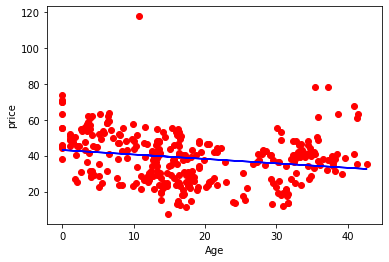

In [ ]:
plt.scatter(inp_train, dep_train, color = 'red')
dep_tpred = regressor.predict(inp_train)
plt.plot(inp_train, dep_tpred, color = 'blue')

plt.xlabel("Age")
plt.ylabel("price")

plt.show()

## Visualise test

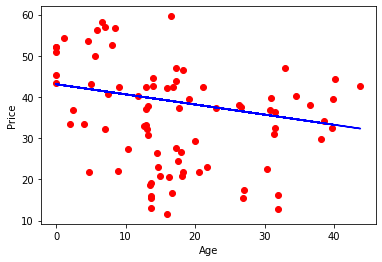

In [ ]:
plt.scatter(inp_test, dep_test, color = 'red')

plt.plot(inp_test, dep_pred, color = 'blue')

plt.xlabel("Age")
plt.ylabel("Price")

plt.show()

## Prediction

In [ ]:
regressor.predict([[32]])

array([35.22261871])

## Coefficient and intercept

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-0.24603642]
43.09578407534933
